<a href="https://colab.research.google.com/github/A-Burnhard/Mall-Customer-Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Loading or importing  mall customer segmentation dataset to notebook
mall_data = pd.read_csv("Mall_Customers.csv")
label_encoder = LabelEncoder()
mall_data["Gender"] = label_encoder.fit_transform(mall_data["Gender"])
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Preprocessing**


**Identifying Missing values**

In [ ]:
# Identify missing values
missing_values = mall_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Identifying Duplicates**

In [ ]:
# Identify duplicate rows
duplicates = mall_data.duplicated()
print("Duplicates instances: \n",duplicates)

Duplicates instances: 
 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


**Outlier Detection using Boxplot**

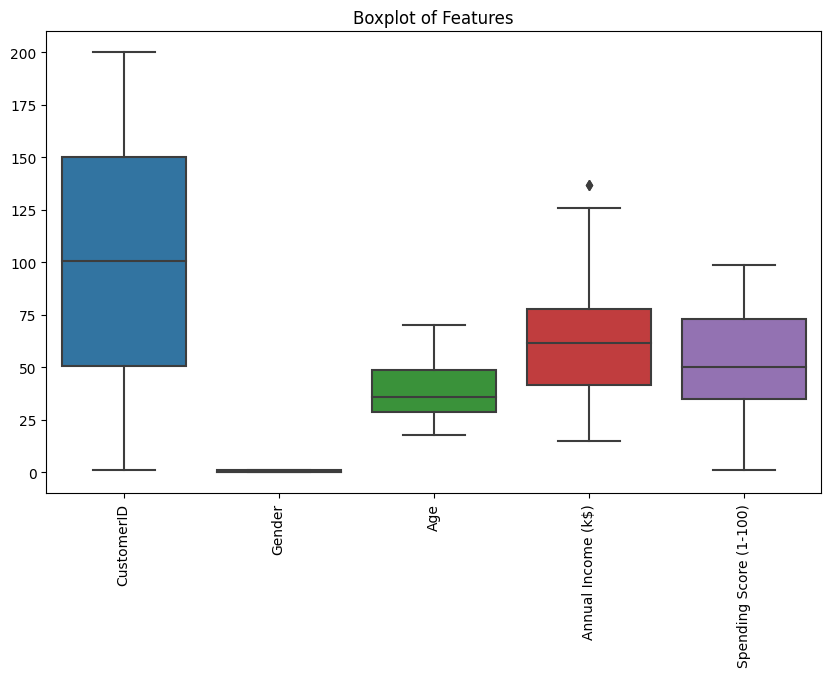

Number of outliers: 2
Outliers transformed.


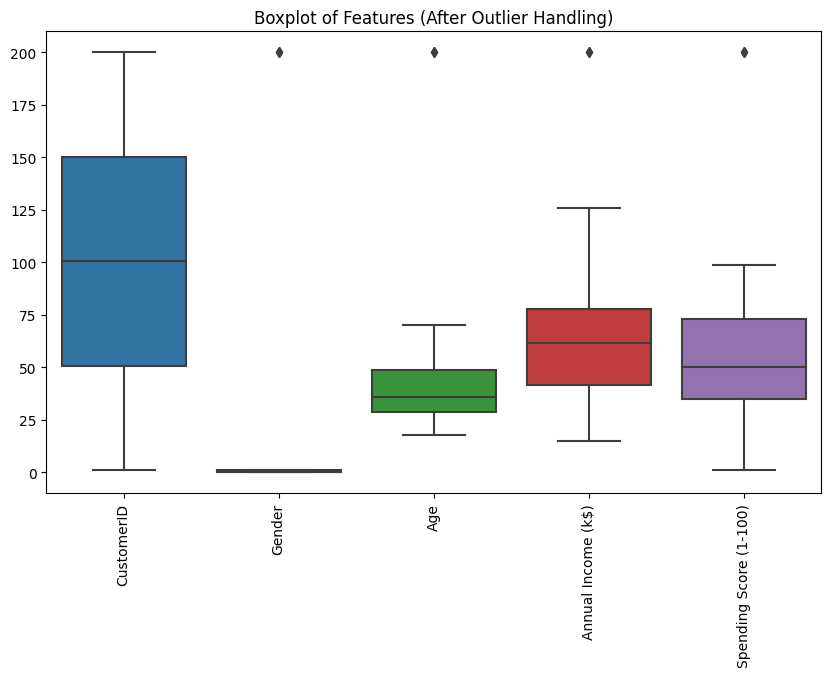

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = mall_data

# Visualize the distribution of each feature using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

# Identify outliers using statistical methods (e.g., Z-score or IQR)
# Z-score method
from scipy.stats import zscore

#data = mall_data.drop("class", axis=1)
z_scores = zscore(data)
outlier_threshold = 3  # Adjust the threshold as per your preference
outliers = (abs(z_scores) > outlier_threshold).any(axis=1)

# IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

# Decide whether to remove outliers or transform them
remove_outliers = False

if remove_outliers:
    # Remove outliers from the dataset
    data = data[~outliers]
    print("Outliers removed.")
else:
    # Transform outliers to a specific value
    outlier_value = 200  # Choose an appropriate value for transformation
    data[outliers] = outlier_value
    print("Outliers transformed.")

# Updated visualization after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features (After Outlier Handling)')
plt.show()

**others**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import LocalOutlierFactor


# Load the mall customer segmentation dataset


# Step 1: Handle missing data values (if any)
# Check for missing values in the dataset
missing_values = mall_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# If there are any missing values, handle them accordingly (e.g., drop rows, fill with mean/median)

# Step 2: Handle duplicate instances (if any)
# Check for duplicate rows in the dataset
duplicates = mall_data.duplicated()
print("Duplicate Instances:")
print(mall_data[duplicates])



# Step 3: Perform outlier detection and influential datapoint detection
# You can use various techniques like Z-score, IQR, or visualizations to identify outliers and influential points

# Example: Using Z-score to detect outliers
z_scores = np.abs((mall_data - mall_data.mean()) / mall_data.std())
outliers = z_scores > 3
print("Outliers:")
print(mall_data[outliers.any(axis=1)])

# Step 4: Check normality of the set of features
# You can use statistical tests like Shapiro-Wilk or visualizations like Q-Q plots to check for normality

# Step 5: Data transformation (if needed)
# Apply transformations like log, square root, or Box-Cox to handle non-normal data

# Example: Applying log transformation to income column
mall_data['Annual Income (k$)'] = np.log(mall_data['Annual Income (k$)'])

# Step 6: Feature selection
# You can use techniques like PCA, SelectKBest, or correlation analysis for feature selection

# Example: Using PCA for feature selection and dimensionality reduction
X = mall_data.drop(['CustomerID', 'Gender'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio to see how much variance is explained by each principal component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Step 7: Continue with the rest of your analysis, modeling, or clustering based on the preprocessed data.
# For clustering, you can use algorithms like K-Means or Hierarchical Clustering on the preprocessed data.

# Example: Using K-Means for customer segmentation
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
mall_data['Cluster'] = kmeans.fit_predict(X_scaled)

# View the resulting clusters and their characteristics
print("Customer Segmentation Clusters:")
print(mall_data.groupby('Cluster').mean())

# Detect influential data points using Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df['Outlier'] = lof.fit_predict(X)

# Note: The steps and examples provided above are general guidelines for preprocessing and clustering the data. Depending on the specifics of your dataset and analysis objectives, you might need to customize and fine-tune the steps accordingly.


Missing Values:
CustomerID                  0
Gender                      0
Age                         0
Annual Income (k$)        199
Spending Score (1-100)      0
Cluster                     0
dtype: int64
Duplicate Instances:
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), Cluster]
Index: []
Outliers:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
198         200     200  200                 NaN                     200   

     Cluster  
198        4  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: ignored

**Defining X and Y values**

In [ ]:
# Separate the target variable (class) from the features
X = mall_data.drop('class', axis=1)
y = mall_data['class']

# Convert the target variable to numeric labels
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = y.map(label_mapping)

KeyError: ignored

**Influencial datapoint detection using leverage and cooks distance**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence





# Add a constant term to the features matrix for the intercept in the linear regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Get the influence statistics
influence = OLSInfluence(results)

# Calculate the leverage values
leverage = influence.hat_matrix_diag

# Calculate the Cook's distance
cooks_distance = influence.cooks_distance

# Identify influential data points based on leverage or Cook's distance
influential_points_leverage = leverage > 2 * (X.shape[1] + 1) / X.shape[0]
influential_points_cooks = cooks_distance[0] > 4 / (X.shape[0] - X.shape[1] - 1)

# Print the influential data points
print("Influential points based on leverage:")
print(X[influential_points_leverage])

print("\nInfluential points based on Cook's distance:")
print(X[influential_points_cooks])


NameError: ignored

**Normality of the set of features using shapiro**

In [ ]:
import pandas as pd
from scipy.stats import shapiro



# Select the features to check for normality
features = X

# Perform Shapiro-Wilk test for each feature
for column in features.columns:
    stat, p_value = shapiro(features[column])
    alpha = 0.05  # Significance level

    print(f"Feature: {column}")
    print(f"Shapiro-Wilk test statistic: {stat}")
    print(f"P-value: {p_value}")

    if p_value > alpha:
        print("Feature appears to be normally distributed.")
    else:
        print("Feature does not appear to be normally distributed.")

    print()


Feature: Age
Shapiro-Wilk test statistic: 0.7606357336044312
P-value: 1.0661613633257229e-16
Feature does not appear to be normally distributed.

Feature: Annual Income (k$)
Shapiro-Wilk test statistic: nan
P-value: 1.0
Feature appears to be normally distributed.

Feature: Spending Score (1-100)
Shapiro-Wilk test statistic: 0.9456781148910522
P-value: 7.816803417881601e-07
Feature does not appear to be normally distributed.

Feature: Cluster
Shapiro-Wilk test statistic: 0.8550924062728882
P-value: 8.330277656912188e-13
Feature does not appear to be normally distributed.



**Data transformation**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X,y

# Separate the target variable (class) from the features

# Perform normalization using Min-Max scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Perform standardization using StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X)

**Feature Selection**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest regressor
rf = RandomForestRegressor()

# Fit the Random Forest model
rf.fit(X, y)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame of feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance (descending order)
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

**Oversampling techniques using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the imbalanced dataset**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Create a SMOTE object
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the balanced class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


**Selecting Appropriate Learners for Training and Validation (K means and agglomerative clustering)**

**K-Means clustering with K-fold cross-validation**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=3)

# Perform K-fold cross-validation
k_fold_scores = cross_val_score(kmeans, X, cv=5)

# Print the cross-validation scores
print("K-Fold Cross-Validation Scores for K-Means:")
print(k_fold_scores)



**Hierachical clustering using agglomerative clusutering**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import LeaveOneOut

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Instantiate the AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Perform leave-one-out cross-validation
loo = LeaveOneOut()
validation_scores = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_pred = agg_clustering.fit_predict(X_train)
    validation_scores.append(y_pred[test_index][0])

# Print the validation scores
print("Leave-One-Out Cross-Validation Scores for Hierarchical Clustering:")
print(validation_scores)
